# Проект: Исследование стартапов
Выполнил: Яфаров Ринат

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.

Цель проекта: Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

Задачи проекта:
* предстоит принять решения по каким столбцам можно объединять данные из разных таблиц;
* предстоит принять решения можно ли доверять данным о сотрудниках стартапов и их образовании;
* предстоит принять решения что значат покупки за 0 или за 1 доллар;
* предстоит принять решения какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
* предстоит принять решения как рассчитать и отобразить численные показатели и динамику.

**Описание данных:** исторические данные представлены несколькими датасетами `acquisition.csv`, `company_and_rounds.csv`, `people.csv`, `education.csv`, `degrees.csv`; также даны дополнительные таблицы `fund.csv` и `investment.csv`.

Датасет **`acquisition.csv`** содержит информацию о покупке одних компаний другими компаниями:
* `id` - идентификатор покупки
* `acquiring_company_id` - идентификатор покупающей компании
* `acquired_company_id` - идентификатор покупаемой компании
* `term_code` - варианты расчета
* `price_amount` - сумма сделки
* `acquired_at` - дата сделки

Датасет **`company_and_rounds.csv`** содержит информацию о покупках и раундах финансирования:
* `company ID` - идентификатор компании
* `name` - название компании
* `category code` - категория области деятельности компании
* `status` - статус компании
* `founded at` - дата инвестирования
* `closed at` - дата закрытия компании
* `domain` - официальный сайт компании
* `network username` - ник компании в сети
* `country code` - код страны компании
* `investment rounds` - число инвестиционных раундов
* `funding rounds` - число раундов финансирования
* `funding total` - сумма финансирования
* `milestones` - вехи финансирования
* `funding round id` - идентификатор этапа финансирования
* `company id` - идентификатор компании
* `funded at` - дата финансирования
* `funding round type` - тип финансирования
* `raised amount` - сумма финансирования
* `pre money valuation` - предварительная денежная оценка
* `participants` - число участников
* `is first round` - ялвяется ли раунд первым
* `is last round` - является ли раунд последним

Датасет **`education.csv`** содержит информацию об образовании сотрудника:
* `id` - идентификатор записи об образовании
* `person_id` - идентификатор работника
* `instituition` - название учебного заведения
* `graduated_at` - дата получения образования

Датасет **`people.csv`** содержит информацию о сотрудниках:
* `id` - идентификатор сотрудника
* `first_name` - имя сотрудника
* `last_name` - фамилия сотрудника
* `company_id` - идентификатор компании
* `network_username` - ник в социальных сетях

Датасет **`degrees.csv`** содержит информацию о типе образования сотрудника:
* `id` - идентификатор записи
* `object_id` - идентификатор сотрудника
* `degree_type` - тип образования
* `subject` - специальность

Дополнительный датасет **`fund.csv`** содержит информацию о фондах:
* `id` - идентификатор фонда
* `name` - название фонда
* `category_code` - категория области деятельности компании
* `founded_at` - дата создания фонда
* `domain` - сайт фонда
* `network_username` - ник фонда в сети
* `country_code` - код страны фонда
* `investment_rounds` - число инвестиционных раундов
* `invested_companies` - число профинансированных компаний
* `milestones` - вехи финансирования

Дополнительный датасет **`investment.csv`** содержит информацию о раундах инвестирования:
* `id` - идентификатор этапа инвестирования
* `funding_round_id` - идентификатор раунда инвестирования
* `company_id` - идентификатор компании
* `funding_round_type` - тип финансирования
* `fund_id` - идентификатор фонда

**Структура проекта:**
1. Знакомство и первичная предобработка данных.
2. Основная редобработка и первичное исследование.
3. Исследовательский анализ.
4. Выводы и рекомендации.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка
### 1.1. Вывод общей информации, исправление названия столбцов


Для начала загрузим все необходимые библиотеки для работы с датасетами:

In [2]:
!pip install phik

     |████████████████████████████████| 686 kB 2.8 MB/s eta 0:00:01


In [3]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

Теперь загрузим датасеты для работы с проектом:

In [4]:
# загрузка датасетов
try:
      acq_df  = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
except:
      display("Файл не найден")
try:
      comp_df  = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
except:
      display("Файл не найден")
try:
      edu_df  = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
except:
      display("Файл не найден")
try:
      peop_df  = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
except:
      display("Файл не найден")
try:
      degrs_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
except:
      display("Файл не найден")
# загрузка дополнительных датасетов
try:
      fund_df  = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
except:
      display("Файл не найден")
try:
      invst_df  = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
except:
      display("Файл не найден")


Далее познакомимся с информацией в каждом столбце:

In [5]:
#загружаем информацию из датафрейма acquisition.csv
acq_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [6]:
#загружаем информацию из датафрейма company_and_rounds.csv
comp_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Столбцы не приведены к стилю `snake case`, поэтому следует из обработать

In [7]:
#загружаем информацию из датафрейма education.csv
edu_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [8]:
#загружаем информацию из датафрейма people.csv
peop_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [9]:
#загружаем информацию из датафрейма degrees.csv
degrs_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Теперь проанализируем основную информацию каждого датафрейма:

In [10]:
#загружаем информацию датафрейма acquisition.csv
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Видно, что много пропусков в столбце `term_code`и столбец `acquired_at` должен быть тип datetime, а не object

In [11]:
#загружаем информацию датафрейма company_and_rounds.csv
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Заметим некую трудность в полноте данных в этом датафрейме. Во многих столбцах присутствует большое количество пропусков. Также тип данных подобран неверно. `company ID`, `company id`, `investment rounds`, `funding  rounds`, `milestones` должны иметь целочисленный тип, `founded at`, `closed at`, `funded at` - тип даты; Трудность о которой можно сказать, скорее всего вызвана ранними манипуляциями над этим датафреймом. Например, можно предположить, что он создан присоедининием двух датафреймов, так как количество пропусков в столбцах примерно похоже

In [12]:
#загружаем информацию датафрейма education.csv
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Можно увидеть большое количество пропусков в столбце с датой получения образования и то, что тип данных выбран object, а не date для данного столбца

In [13]:
#загружаем информацию датафрейма people.csv
peop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Видно, что малая часть пропусков присутствует в столбце с именем и фамилией сотрудников, но существенная часть в колонках `company_id` и `network_username`. Кроме того, тип данных у `company_id` лучше привести к целочисленному типу

In [14]:
#загружаем информацию датафрейма degrees.csv
degrs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Видно немалое количество пропусков в столбцах с типом образования и специальностью

Для полного анализа данных перед предобработкой стоит проанализировать также наличие дубликатов в датафреймах:

In [15]:
display('Количество полных дубликатов acq_df:', acq_df.duplicated().sum())
display('Количество полных дубликатов comp_df:', comp_df.duplicated().sum())
display('Количество полных дубликатов edu_df:', edu_df.duplicated().sum())
display('Количество полных дубликатов peop_df:', peop_df.duplicated().sum())
display('Количество полных дубликатов degrs_df:', degrs_df.duplicated().sum())

'Количество полных дубликатов acq_df:'

0

'Количество полных дубликатов comp_df:'

0

'Количество полных дубликатов edu_df:'

0

'Количество полных дубликатов peop_df:'

0

'Количество полных дубликатов degrs_df:'

0

Пропусков не обнаружено, перейдем к предообработки данных

### 1.2. Смена типов и анализ пропусков



Для начала обработаем все неправильные типы данных у столбцов:

In [16]:
# меняем тип данных в датафрейме acq_df
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])

In [17]:
acq_df.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [18]:
# меняем тип данных в датафрейме comp_df
for col in ['founded  at', 'closed  at', 'funded  at']:
    comp_df[col] = pd.to_datetime(comp_df[col])

In [19]:
comp_df.dtypes

company  ID                     float64
name                             object
category  code                   object
status                           object
founded  at              datetime64[ns]
closed  at               datetime64[ns]
domain                           object
network  username                object
country  code                    object
investment  rounds              float64
funding  rounds                 float64
funding  total                  float64
milestones                      float64
funding  round  id              float64
company  id                     float64
funded  at               datetime64[ns]
funding  round  type             object
raised  amount                  float64
pre  money  valuation           float64
participants                    float64
is  first  round                float64
is  last  round                 float64
dtype: object

In [20]:
# меняем тип данных в датафрейме education
edu_df['graduated_at'] = pd.to_datetime(edu_df['graduated_at'])

In [21]:
edu_df.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

Типы данных в датафреймах теперь имеею корректный формат

Далее проведем обработку названий столбцов в датафрейме `comp_df`

In [22]:
#приводим названия столбцов comp_df к виду snake case:
comp_df=comp_df.rename(columns={'company  ID':'company_ID',
                                    'category  code':'category_code',
                                    'founded  at':'founded_at',
                                    'closed  at':'closed_at',
                                    'network  username':'network_username',
                                    'country  code':'country_code',
                                    'investment  rounds':'investment_rounds',
                                    'funding  rounds':'funding_rounds',
                                    'funding  total':'funding_total',
                                    'funding  round  id':'funding_round_id',
                                    'company  id':'company_id',
                                    'funded  at':'funded_at',
                                    'funding  round  type':'funding_round_type',
                                    'raised  amount':'raised_amount',
                                    'pre  money  valuation':'pre_money_valuation',
                                    'is  first  round':'is_first_round',
                                    'is  last  round':'is_last_round'
                                   })

In [23]:
comp_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Далее стоит оценить полноту данных - сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [24]:
# рассчитаем долю пропусков в acq_df
(acq_df.isna().sum() / acq_df.shape[0]).sort_values(ascending=False)

term_code               0.805358
acquired_at             0.003083
id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
price_amount            0.000000
dtype: float64

Данный датафрейм можно оценить как достаточно полный для анализа. Есть только один момент с пропусками в столбце `term_code` - 81%, в котором находится информация о вариантах расчета.Данные столбец не будет сильно важна для дальнейшего анализа.

In [25]:
# рассчитаем долю пропусков в comp_df
(comp_df.isna().sum() / comp_df.shape[0]).sort_values(ascending=False)

closed_at              0.984162
funded_at              0.758098
is_last_round          0.756959
is_first_round         0.756959
participants           0.756959
pre_money_valuation    0.756959
raised_amount          0.756959
funding_round_type     0.756959
funding_round_id       0.756959
company_id             0.756959
network_username       0.561316
country_code           0.501286
founded_at             0.495091
category_code          0.339288
domain                 0.324258
company_ID             0.001387
milestones             0.001387
name                   0.001387
funding_rounds         0.001387
investment_rounds      0.001387
status                 0.001387
funding_total          0.001387
dtype: float64

Видно,что большое количество пропусков в важных для дальнейшего анализа данных столбцах - это `funding round type`, `participants`, `raised_amount`, `funding_round_id`, `company_id` - у всех доля пропусков составляет около 76% по всем строкам. Необходимо понять с чем связана подобная ситуация, либо ввести определенную стратегию по дальнейшему анализу данных, приняв эти пропуски.

In [26]:
# рассчитаем долю пропусков в edu_df
(edu_df.isna().sum() / edu_df.shape[0]).sort_values(ascending=False)

graduated_at    0.470359
instituition    0.000502
id              0.000000
person_id       0.000000
dtype: float64

Данный датафрейм можно оценить как достаточно полный для анализа. Есть только один момент с пропусками в столбце `graduated_at` - 47%.

In [27]:
# рассчитаем долю пропусков в peop_df
(peop_df.isna().sum() / peop_df.shape[0]).sort_values(ascending=False)

company_id          0.847315
network_username    0.828560
first_name          0.000022
last_name           0.000004
id                  0.000000
dtype: float64

Данный датафрейм можно назвать достаточно неполным, так как в нем отсутствует необходимая информация об идентификаторе компании, который показывает нам к какой компании привязан сотрудник.Доли пропусков: `company_id` - 85%, `network_username` - 83%

In [28]:
degrs_df
# рассчитаем долю пропусков в degrs_df
(degrs_df.isna().sum() / degrs_df.shape[0]).sort_values(ascending=False)

subject        0.258298
degree_type    0.102345
id             0.000000
object_id      0.000000
dtype: float64

Данный датафрейм достаточно полный для анализа. Однако, есть немного пропусков: 25% пропусков находится в колонке `subject` со специальностью сотрудника и 10% в колонке `degree_type` с типом образования.

### Промежуточный вывод

Каждый датафрейм загружен, выведена информация о них и приведены некоторые замечания. Обобщим информацию о датафреймах:


**1.** Датафрейм `acq_df.csv` имеет 9407 строк и 6 столбцов. Основные подробности или изменения, осуществленные над ним:
* Тип данных в столбце `acquired_at` изменен на дату.
* Много пропусков в колонке с вариантами расчета `term_code` - 81%.

**2.** Датафрейм `comp_df.csv` имеет 217774 строки и 22 колонки. Основные подробности или изменения:
* Осуществлено форматирование названий столбцов на тип snake_case.
* Типы данных у колонок `company_ID`,`company_id`, `investment_rounds`, `funding_rounds`, `milestones` предпочтительнее должны обладать целочисленным типом, а `founded_at`, `closed_at`, `funded_at` - типом даты. Как следствие, тип данных у столбцов `founded_at`, `closed_at`, `funded_at` изменен на datetime с помощью библиотеки pandas.
* В датафрейме большое число пропусков: примерно 76% у половины колонок (например, `funding_round_type`, `participants`, `raised_amount`, `funding_round_id`.
* В целом, датафрейм имеет странную структуру, к тому же заметны не совсем ясные дубликаты-колонки `company_ID` и `company_id`, а также `funding_total` и `raised_amount`. Предположительно, датафрейм является комбинацией нескольких с определенным типом объединения.

**3.** Датафрейм `edu_df.csv` имеет 109610 строк и 4 колонки. Основные подробности:
* Изменен тип данных у колонки `graduated_at` на тип datetime.
* Та же колонка с датой получения образования имеет 47% пропусков, остальные поля характеризуются полнотой содержащейся информации.

**4.** Датафрейм `peop_df.csv` имеет 226709 строк и 5 столбцов. Основные подробности:
* Основная часть пропусков в колонках `company_id` (85%) и `network_username` (83%) - достаточно странно, так как сотрудники не привязаны к какой-то определенной компании.
  
**5.** Датафрейм `degrs_df.csv` имеет 109610 строк и 4 колонки. Основные подробности:
* Пропуски характерны для колонок `subject` со специальностью сотрудника (25%), а также `degree_type` с типом образования (10%).

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание выполним без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.
На основе полученных данных ответим на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

 Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

In [29]:
# перед составлением таблицы создадим новый столбец с годом финансирования
comp_df['year_fund'] = comp_df['funded_at'].dt.year

In [30]:
# составляем сводную таблицу
pivot_table = pd.pivot_table(comp_df, index='year_fund', values='raised_amount', aggfunc={'raised_amount': ['median', 'count']})

# редактируем названия столбцов на более логичные
pivot_table.columns = ['cnt_rounds', 'median_fund']

# переводим год в целое значение
pivot_table.index = pd.to_numeric(pivot_table.index).astype('int64')
display(pivot_table.sort_values(ascending=False,by='cnt_rounds'))

,cnt_rounds,median_fund
year_fund,,
2013,11072,1200000.0
2012,9970,1000000.0
2011,9204,1200000.0
2010,6221,1602500.0
2009,4151,2000000.0
2008,3774,3110000.0
2007,3279,3973320.0
2006,2436,5000000.0
2005,1633,5500000.0


Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [31]:
# создаем отфильтрованный датафрейм
pivot_table = pivot_table[pivot_table['cnt_rounds'] > 50]
display(pivot_table.sort_values(ascending=False,by='cnt_rounds'))

,cnt_rounds,median_fund
year_fund,,
2013,11072,1200000.0
2012,9970,1000000.0
2011,9204,1200000.0
2010,6221,1602500.0
2009,4151,2000000.0
2008,3774,3110000.0
2007,3279,3973320.0
2006,2436,5000000.0
2005,1633,5500000.0


На основе получившейся таблицы построем график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования. Так как нам надо показать изменения показателей с течением времени будем использовать линейный график.

<Figure size 1080x1080 with 0 Axes>

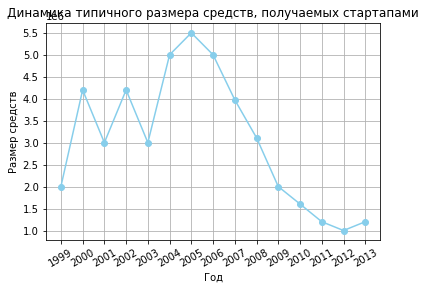

In [32]:
# сбросим индексы таблицы для правильного построения
pivot_graphic = pivot_table.reset_index()

# строим визуализацию
plt.figure(figsize=(15,15))

pivot_graphic[['year_fund', 'median_fund']].plot(
    kind='line',
    x='year_fund',
    y='median_fund',
    rot=30,
    color='skyblue',
    marker='o',
    legend=False,
    title='Динамика типичного размера средств, получаемых стартапами')

plt.xlabel('Год')
plt.ylabel('Размер средств')
plt.xticks(np.arange(min(pivot_graphic['year_fund']), max(pivot_graphic['year_fund']) + 1, 1))
plt.yticks(np.arange(min(pivot_graphic['median_fund']), max(pivot_graphic['median_fund']) + 500000, 500000))
plt.grid()
plt.show()

Вывод: на основе полученных данных и их визуализации подытожим следующие наблюдения:
* Максимальный размер собранных средств состоялся в 2005 году. Далее выделяются 2004 и 2006 года по убыванию суммы соответственно.
* 2013 год выделяется из всех годов максимальным количеством раундов финансирования, а размер средств, выделяемых в рамках каждого раунда, составил 1.2 млн денежных единиц. 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Перед работой над исследованием стоит выяснить: нужно ли присоединять к объединенному датафрейму из `people.csv`,`education.csv`, еще и датасет `degrees.csv`

Перед проверкой объединим датасеты `people.csv` и `education.csv`

In [33]:
# объединим датасеты
peop_edu_df = peop_df.merge(edu_df, how='left', left_on='id', right_on='person_id', suffixes=['_peop', '_edu'])
peop_edu_df.head(5)

,id_peop,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [34]:
#найдем количество дубликатов по имени и фамилии, это люди с несколькими образованиями
peop_edu_df.duplicated(['first_name','last_name']).sum()

55036

In [35]:
# удалим дубликаты по имени и фамилии
peop_edu_df = peop_edu_df.drop_duplicates(['first_name', 'last_name'])
peop_edu_df.head(5)

,id_peop,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [36]:
# создадим дополнительные столбцы с указателем на пропуски в строке
peop_edu_df['inst_isna'] = peop_edu_df['instituition'].isna()
peop_edu_df['grad_isna'] = peop_edu_df['graduated_at'].isna()

# вывод результата
peop_edu_df.head(3)

,id_peop,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,inst_isna,grad_isna
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,False,True
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,True,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,True,True


In [37]:
# выведем количество данных с наличием образования в объединенном столбце
(peop_edu_df[(peop_edu_df['inst_isna'] == False) | (peop_edu_df['grad_isna'] == False)].shape[0]) / peop_edu_df.shape[0]

0.30263145520036866

Далее присоединим еще одну таблицу `degrees.csv` и выполним такие же действия.

In [38]:
# выведем "чистый id" через составной
degrs_df['pure_id'] = pd.to_numeric(degrs_df['object_id'].str.replace('p:', ''))

In [39]:
# объединим 3 датафрейма
ped_df = peop_edu_df.merge(degrs_df, how='left', left_on='id_peop', right_on='pure_id')

# также удалим дубликаты по имени и фамилии, чтобы каждый сотрудник входил в список один раз
ped_df = ped_df.drop_duplicates(['first_name', 'last_name'])
ped_df.head(5)

,id_peop,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,inst_isna,grad_isna,id,object_id,degree_type,subject,pure_id
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,False,True,2415.0,p:10,NaN,Computer Science,10.0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,True,True,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,True,True,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,True,True,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,True,True,NaN,NaN,NaN,NaN,NaN


In [40]:
# создадим дополнительные столбцы с указателем на пропуски в строке
ped_df['inst_isna'] = ped_df['instituition'].isna()
ped_df['grad_isna'] = ped_df['graduated_at'].isna()
ped_df['degree_isna'] = ped_df['degree_type'].isna()
ped_df['sbj_isna'] = ped_df['subject'].isna()

# вывод результата
ped_df.head(3)

,id_peop,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,inst_isna,grad_isna,id,object_id,degree_type,subject,pure_id,degree_isna,sbj_isna
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,False,True,2415.0,p:10,NaN,Computer Science,10.0,True,False
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,True,True,NaN,NaN,NaN,NaN,NaN,True,True
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,True,True,NaN,NaN,NaN,NaN,NaN,True,True


In [41]:
# выведем количество данных с наличием образования в объединенном столбце
(ped_df[(ped_df['inst_isna'] == False) | (ped_df['grad_isna'] == False) | (ped_df['degree_isna'] == False) | (ped_df['sbj_isna'] == False)].shape[0]) / ped_df.shape[0]

0.3026878838322565

Видем, что количество данных при присоединении третьего датасета не изменилось. Поэтому можем сделать вывод, что в этом нет необходимости

Создадим функцию, которая обобщает информацию об образовании. Для удобства дальнейшей работы реализуем следующую логику: если у человека есть запись либо об учебном заведении, либо о дате выпуска, то функция будет возвращать значение "0". В противном случае будет возвращаться "1". Это упростит поиск доли сотрудников *без информации об образовании*. Таким образом, метка "1" будет означать, что у сотрудника отсутствует любая информация об образовании, а "0" будет указывать на наличие данных либо об учебном заведении, либо о дате выпуска.

In [42]:
# функция для проверки наличия образования
def no_inf(row):
    if (row['inst_isna'] == 0) | (row['grad_isna'] == 0):
        return 0
    else:
        return 1  

In [43]:
# применяем функцию к датафрейму
peop_edu_df['not_education'] = peop_edu_df.apply(no_inf, axis=1)
peop_edu_df.head(7)

,id_peop,first_name,last_name,company_id,network_username,id_edu,person_id,instituition,graduated_at,inst_isna,grad_isna,not_education
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,False,True,0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,True,True,1
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,True,True,1
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,True,True,1
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,True,True,1
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,True,True,1
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01,False,False,0


In [44]:
# выводим информацию о компаниях, сортировка по убыванию персонала
peop_edu_df.groupby('company_id').agg({'id_peop': 'count', 'not_education': 'mean'}).sort_values(by='id_peop', ascending=False)

,id_peop,not_education
company_id,,
59.0,226,0.314159
29.0,134,0.261194
1242.0,124,0.266129
231067.0,71,0.197183
499.0,59,0.305085
...,...,...
6777.0,1,1.000000
63265.0,1,1.000000
63268.0,1,0.000000


Проверим распределение численности сотрудников по компаниям с помощью decsribe и quantile, так как данные численные и меют непрерывное распределение:

In [45]:
# берем только одну колонку из полученного ранее датасета и применяем describe
test = peop_edu_df.groupby('company_id').agg({'id_peop': 'count', 'not_education': 'mean'}).sort_values(by='id_peop', ascending=False)
test['id_peop'].describe()

count    21829.000000
mean         1.483256
std          2.604611
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        226.000000
Name: id_peop, dtype: float64

In [46]:
# ищем процентиль
test['id_peop'].quantile(0.95)

3.0

In [47]:
# ищем процентиль
test['id_peop'].quantile(0.99)

7.0

Согласно статистическим данным, можно отметить, что большинство компаний имеют лишь одного сотрудника (75% от общего числа). 95% компаний располагают не более чем тремя сотрудниками, а 99% ограничиваются семью. В оставшемся проценте находятся компании с значительно большим числом сотрудников, включая одну, в которой максимальное количество работников достигает 226 человек.

In [48]:
# изменим название колонок в соответствии со смыслом содержимого
comp_info = peop_edu_df.groupby('company_id').agg({'id_peop': 'count', 'not_education': 'mean'}).sort_values(by='id_peop', ascending=False)
comp_info.columns = ['personal', 'part_no_education']

Целесообразно разделить все компании следующим образом (согласно классификации предприятий ФЗ №209):
* Численность работников до 15 чел. включительно - микропредприятие ('micro enterprise')
* Численность работников от 16 до 100 чел. включительно - малое предприятие ('small enterprise')
* Численность работников от 101 до 250 чел. включительно - среднее предприятие ('medium enterprise')


Но так как 99 процентиль показал 7 сотрудников будет целесообразно понизить пороговые значения:
* Численность работников до 5 чел. включительно - микропредприятие ('micro enterprise')
* Численность работников от 16 до 100 чел. включительно - малое предприятие ('small enterprise')
* Численность работников от 101 до 250 чел. включительно - среднее предприятие ('medium enterprise')

In [49]:
def category_company(row): 
    if row <= 5:
        return 'micro enterprise'
    if 15 < row <= 100:
        return 'small enterprise'
    if 100 < row <= 250:
        return 'medium enterprise'

In [50]:
# перед проведением категоризации определим датафрейм
company_df = comp_info.reset_index()

# проведем категоризацию данных
company_df['category'] = company_df['personal'].apply(category_company)

# результат
display(company_df)

,company_id,personal,part_no_education,category
0,59.0,226,0.314159,medium enterprise
1,29.0,134,0.261194,medium enterprise
2,1242.0,124,0.266129,medium enterprise
3,231067.0,71,0.197183,small enterprise
4,499.0,59,0.305085,small enterprise
...,...,...,...,...
21824,6777.0,1,1.000000,micro enterprise
21825,63265.0,1,1.000000,micro enterprise
21826,63268.0,1,0.000000,micro enterprise
21827,63286.0,1,0.000000,micro enterprise


После получения промежуточной таблицы, в которой будет представлена численность работников каждого предприятия и доля сотрудников без данных об образовании, мы проведем группировку по типам предприятий. Затем внутри каждой группы определим среднюю долю сотрудников, не имеющих информации об образовании.

In [51]:
# получаем данные о средней доли сотрудников без образования
company_df.groupby('category').agg({'part_no_education': 'mean'})

,part_no_education
category,
medium enterprise,0.280494
micro enterprise,0.464882
small enterprise,0.390147


<Figure size 1080x1080 with 0 Axes>

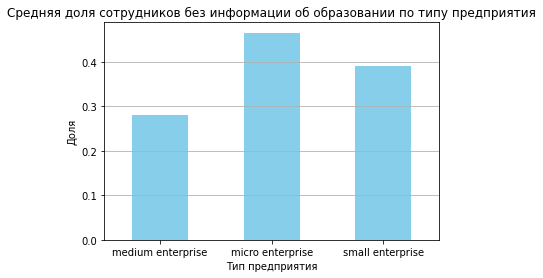

In [52]:
# строим визуализацию на основе полученных данных
plt.figure(figsize=(15, 15))

company_df.groupby('category').agg({'part_no_education': 'mean'}).plot(
    kind='bar',
    rot=0,
    color='skyblue',
    legend=False,
    title='Средняя доля сотрудников без информации об образовании по типу предприятия')

plt.xlabel('Тип предприятия')
plt.ylabel('Доля')
plt.grid(axis='y')
plt.show()

Визуализация наглядно демонстрирует, что наиболее высокая доля сотрудников без наличия записей об образовании среди микропредприятий (micro enterprise), далее идут малые предприятия.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Используя множества, определим уникальные данные в столбцах `network_username` каждого датафрейма.

In [53]:
# определим множество ников компаний и найдем его размер
network_comp = set(comp_df['network_username'])
print('Количество уникальных ников среди датафрейма company_and_rounds:', len(network_comp))

Количество уникальных ников среди датафрейма company_and_rounds: 79572


In [54]:
# определим множество ников компаний и найдем его размер
network_people = set(peop_df['network_username'])
print('Количество уникальных ников среди датафрейма people:', len(network_people))

Количество уникальных ников среди датафрейма people: 38422


In [55]:
# определим множество ников компаний и найдем его размер
network_fund = set(fund_df['network_username'])
print('Количество уникальных ников среди датафрейма fund:', len(network_fund))

Количество уникальных ников среди датафрейма fund: 2099


После того как найдено количество уникальных значений в разных столбцах `network_username`, ищем количество пересечений множеств по отдельности и у всех сразу.

In [56]:
# выводим количество пересечений у множеств
print('Количество пересечений у company_and_rounds и people:', len(network_comp.intersection(network_people)))

Количество пересечений у company_and_rounds и people: 2200


In [57]:
# выводим количество пересечений у множеств
print('Количество пересечений у company_and_rounds и fund:', len(network_comp.intersection(network_fund)))

Количество пересечений у company_and_rounds и fund: 71


In [58]:
# выводим количество пересечений у множеств
print('Количество пересечений у people и fund:', len(network_people.intersection(network_fund)))

Количество пересечений у people и fund: 80


In [59]:
# выводим количество пересечений у множеств
print('Количество пересечений у всех трех датафреймов:', len(network_comp.intersection(network_people, network_fund)))

Количество пересечений у всех трех датафреймов: 8


Будем считать таблицу `company_and_rounds` основной, так как в ней больше всего уникальных ников. Для решения вопроса о присоединении по столбцу `network_username` проведем сравнение пересечений множеств в долях.

In [60]:
# найдем долю пересечений от общего количества уникальных ников
print('Доля строк company_and_round, имеющих пересечение с people:', len(network_comp.intersection(network_people)) / len(network_comp))

Доля строк company_and_round, имеющих пересечение с people: 0.0276479163524858


In [61]:
# найдем долю пересечений от общего количества уникальных ников
print('Доля строк company_and_round, имеющих пересечение с fund:', len(network_comp.intersection(network_fund)) / len(network_comp))

Доля строк company_and_round, имеющих пересечение с fund: 0.0008922736641029508


In [62]:
# найдем долю пересечений от общего количества уникальных ников
print('Доля строк company_and_round, имеющих пересечение с обоими множествами:', len(network_comp.intersection(network_people, network_fund)) / len(network_comp))

Доля строк company_and_round, имеющих пересечение с обоими множествами: 0.0001005378776454029


Таким образом, можно сделать вывод о нецелесообразности присоединения датафреймов по столбцу network_username, так как общая доля уникальных ников в датафрейме с компаниями составляет 79572 значений, а доля потенциально присоединяемых строк 0.027 (или примерно 3%) и 0.0009 (или примерно 0.1%) соответственно с датафреймами `people.csv` и `fund.csv`.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Из предыдущего предположения о том, что весь датасет `company_and_rounds` образован путем слияния нескольких, проведем его обработку. Возьмем колонки (первые 13), предположительно относящиеся к одной из соединенных таблиц и соберем в один отдельный датафрейм `company_df`. Оставшиеся колонки и данные в них объединим в датафрейм `rounds_df`.

Начнем с удаления пустых строк, в которых не содержится совершенно никаких данных о компаниях - во всех 13 колонках (вне зависимости от того, есть ли данные о раундах), потому что без подобных данных дальнейший анализ нецелесообразен. Выведем информацию в этих 13 колонках:

In [63]:
comp_df.iloc[:, :13].head(10)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0


In [64]:
# удаляем пустые строки в первой логической части
subset_columns = ['company_id', 
                  'name', 
                  'category_code', 
                  'status', 
                  'founded_at', 
                  'closed_at', 
                  'domain', 
                  'network_username', 
                  'country_code', 
                  'investment_rounds', 
                  'funding_rounds', 
                  'funding_total', 
                  'milestones']   

# получаем первый логический датафрейм
company_df = comp_df.dropna(how='all', subset=subset_columns).reset_index(drop=True)
company_df = company_df.iloc[:, :13]
company_df.head(10)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0


Поступим также со второй логической частью датасета, если в оставшихся 9 колонках во всех строках пропуски - удаляем такие строки, так как информации о раундах нет и в дальнейшем анализе они бесполезны. Это будет датафрейм `rounds_df`:

In [65]:
# удаляем пустые строки во второй логической части таблицы
subset_columns = ['funding_round_id',
                  'company_id', 
                  'funded_at', 
                  'funding_round_type', 
                  'raised_amount', 
                  'pre_money_valuation', 
                  'participants', 
                  'is_first_round', 
                  'is_last_round'] 

# получим второй логический датафрейм
rounds_df = comp_df.dropna(how='all', subset=subset_columns).reset_index(drop=True)
rounds_df = rounds_df.iloc[:, 13:-1]
rounds_df.head(10)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
4,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0
5,3619.0,10015.0,2008-10-10,series-a,2000000.0,0.0,2.0,0.0,1.0
6,18213.0,10015.0,2010-09-10,series-b,9000000.0,0.0,4.0,0.0,0.0
7,27747.0,10015.0,2012-01-24,series-c+,12000000.0,0.0,4.0,0.0,0.0
8,45409.0,10015.0,2013-08-13,series-c+,43000000.0,0.0,5.0,1.0,0.0
9,54006.0,10015.0,2012-01-01,venture,2069200.0,0.0,4.0,0.0,0.0


In [66]:
# запоминаем количество строк в company_df
cnt_rows = company_df.shape[0]

# проверка на дубликаты company_df
company_df.duplicated().sum()

21220

In [67]:
# проверка на дубликаты rounds_df
rounds_df.duplicated().sum()

0

Вероятнее всего, такое количество дубликатов вызвано присоединением данных из `rounds_df` к `company_df`. Это не ошибка, так как одному и тому же набору полей в `company_df`, если речь идет об одной компании с одной и той же информацией о себе, может соответствовать разная информация по раундам из полей датафрейма `rounds_df`.

Для дальнейшей работы, "очистим" датафрейм `company_df` от дубликатов:

In [68]:
# удаляем дубликаты в company_df
company_df = company_df.drop_duplicates().reset_index(drop=True)

# заново проверяем количество дубликатов
company_df.duplicated().sum()

0

In [69]:
print('Доля удаленных дублирующихся данных:', round(1 - company_df.shape[0] / cnt_rows, 3))

Доля удаленных дублирующихся данных: 0.097


Таким образом, практически 10% данных удалилось из датафрейма `company_df`, так как это были дубликаты. Датафрейм `rounds_df` чистить не требуется, в нем нет дубликатов.

In [70]:
# доля пропусков в полях company_df
company_df.isna().mean()

company_ID           0.000005
name                 0.000005
category_code        0.373271
status               0.000005
founded_at           0.535868
closed_at            0.986670
domain               0.356182
network_username     0.589980
country_code         0.552337
investment_rounds    0.000005
funding_rounds       0.000005
funding_total        0.000005
milestones           0.000005
dtype: float64

In [71]:
# количество пропусков в полях rounds_df
rounds_df.isna().mean()

funding_round_id       0.000000
company_id             0.000000
funded_at              0.004686
funding_round_type     0.000000
raised_amount          0.000000
pre_money_valuation    0.000000
participants           0.000000
is_first_round         0.000000
is_last_round          0.000000
dtype: float64

Пропуски наблюдаются в обоих датафреймах расположены в побочных полях, не относящихся к анализу.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

Будем работать с датафреймом `company_df` из предыдущего пункта. Возьмем первые 10 строк, чтобы вспомнить хранимые им данные:

In [75]:
display(company_df.head(10))

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
5,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,0.0,0.0,0.0
6,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,0.0,0.0,0.0
7,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,0.0,0.0,1.0
8,10005.0,Thomas Publishing,advertising,operating,NaT,NaT,thomaspublishing.com,NaN,USA,0.0,0.0,0.0,1.0
9,100062.0,Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.0,0.0,0.0,1.0


Перейдем к отфильтровыванию этого датафрейма по указанным условиям: значения в `funding_rounds` или `investment_rounds` больше нуля, а также значение в `status` равняется **acquired**. Назовем полученный датафрейм `base_df`.

In [74]:
# отфильтровываем company_df для получения нового датафрейма
base_df = company_df[((company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0)) | (company_df['status'] == 'acquired')]
base_df.reset_index(drop=True)
display(base_df.head())
display(base_df.tail())

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
196544,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
196545,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
196552,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


Проверим полученный датасет на полноту, выведем пропуски:

In [76]:
# проверка на пропуски
base_df.isna().sum().sort_values(ascending=False)

closed_at            38619
network_username     19897
founded_at           12940
country_code          6005
category_code         5432
domain                4993
company_ID               0
name                     0
status                   0
investment_rounds        0
funding_rounds           0
funding_total            0
milestones               0
dtype: int64

Пропуски наблюдаются,но не в важных для дальнейшего анализа столбцах.

Проверим датафрейм на дубликаты:

In [77]:
# проверка на дубликаты
base_df.duplicated().sum()

0

В итоге был получен датафрейм `base_df` путем фильтрации исходного `company_df`, он прошел проверку на полноту и корректность данных.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

Проверим данные в столбце на пропуски:

In [78]:
# проверка на пропуски
base_df['funding_total'].isna().sum()

0

Применим метод **describe** для снятия статистических показателей со столбца `funding_total`:

In [79]:
base_df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

Минимальное значение, а также 25-процентный показатель, равны 0, что говорит о том, что в данных много значений с нулевым размером общего финансирования. Будем иметь это в виду для дальнейшего анализа.

Также заметна большая разница между средним арифметическим и медианой, причем среднее значительно больше. Это указывает на то, что в нашем столбце присутствуют выбросы, которые сдвигают значение среднего арифметического в большую сторону. Графически убедимся в этом, построив 2 диаграммы размаха: с выбросами и без.

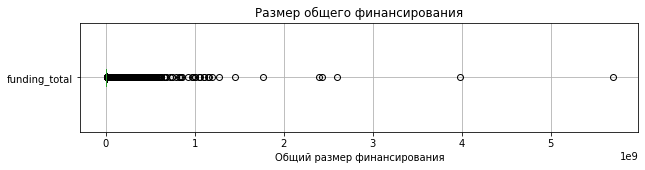

In [80]:
# строим диаграмму размаха с выбросами
plt.figure(figsize=(10, 2))

base_df.boxplot(column='funding_total', vert=False)

plt.title('Размер общего финансирования')
plt.xlabel('Общий размер финансирования')
plt.show()

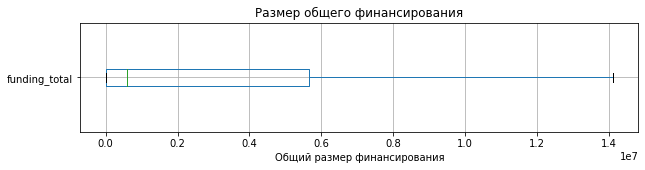

In [81]:
# строим диаграмму размаха без выбросов
plt.figure(figsize=(10, 2))

base_df.boxplot(column='funding_total', vert=False, showfliers=False)

plt.title('Размер общего финансирования')
plt.xlabel('Общий размер финансирования')
plt.show()

Диаграмма значительно искажается при наличии выбросов, но скопление основных значений наблюдается до 1 млрд. 
Однако и диаграмма без выбросов "срезает" много данных. Обратимся к перцентилям:

In [82]:
# считаем процентили
print('50% значений (верхняя граница):', base_df['funding_total'].quantile(0.5))
print('95% значений (верхняя граница):', base_df['funding_total'].quantile(0.95))
print('99% значений (верхняя граница):', base_df['funding_total'].quantile(0.99))

50% значений (верхняя граница): 600000.0
95% значений (верхняя граница): 43500000.0
99% значений (верхняя граница): 133948660.00000046


В итоге в данном случае выбросы в значительной степени искажают типичное значение, поэтому лучше взять в качестве него медиану данных. Таким образом, типичное значение для финансирования составляет около 600 тыс. рублей. Выбивающимися значениями можно считать все, превыщающие 99-процентный показатель, который составляет 133948660 денежных единиц, именно они сдвигают среднее арифметическое.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

Уточним, по каким данным потребуется соединять датафрейм `acquisition` с датафреймом `base_df`. В первом датафрейме имеется информация об идентификаторе покупаемой компании в поле **`acquired_company_id`** и суммой сделки (по которой впоследствии проведем фильтрацию), а во втором датафрейме поле **`company_id`** той компании, которая была куплена.

In [84]:
# определяем пересечение идентификаторов компаний
len(set(acq_df['acquired_company_id']).intersection(set(base_df['company_ID'])))

9247

In [85]:
# количество строк в левом датафрейме
acq_df.shape[0]

9407

Таким образом, в датафрейме `base_df` в поле `company_id` лежит информация об идентификаторах проданных компаниях.

Проведем проверку датафрейма `acquisition` на дубликаты и пропуски:

In [86]:
# проверка на дубликаты
acq_df.duplicated().sum()

0

In [87]:
# проверим на дубликаты в id
acq_df.duplicated(subset='id').sum()

0

In [88]:
# проверка на пропуски
acq_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

Таким образом, датафрейм `acquisition` имеет хорошо организованную структуру данных и может использоваться для дальнейшего присоединения к датафрейму `base_df`. Назовем объединенный датафрейм `merge_df`:

In [90]:
# проведем объединение датафреймов
merge_df = base_df.merge(acq_df, how='inner', left_on='company_ID', right_on='acquired_company_id')
merge_df

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1,11,10,NaN,20000000,2007-05-30
1,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20,377,100,cash,0,2005-05-29
2,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901,5,1001,cash_and_stock,47500000,2009-08-10
3,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878,23054,10014,NaN,0,2010-09-30
4,100265.0,Coastal Supply Company,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,6106,38215,100265,NaN,0,2011-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,11484.0,Networktise,web,acquired,2008-08-01,NaT,networktise.com,NaN,NaN,0.0,0.0,0.0,0.0,8605,205151,11484,NaN,0,2013-05-10
9386,153326.0,Yoke,web,acquired,NaT,NaT,apps.socialnet.com::yokeapp,NaN,NaN,0.0,1.0,500000.0,1.0,7948,2352,153326,NaN,0,2012-09-11
9387,53224.0,UberNetwork,web,acquired,NaT,NaT,ubernetwork.com::,NaN,NaN,0.0,0.0,0.0,1.0,5034,45529,53224,NaN,0,2011-01-23
9388,69612.0,Networkcism,NaN,acquired,NaT,NaT,networkcism.com,NaN,NaN,0.0,0.0,0.0,0.0,5189,22309,69612,NaN,0,2011-02-23


После получения объединенного датасета отфильтруем его по заданным критериям: **`price_amount`** - сумма сделки - равняется 0 или 1, при этом **`funding_total`** - общий объем финансирования - ненулевой. Назовем этот датафрейм `sold_df`.

In [91]:
# отфильтровываем датафрейм
sold_df = merge_df[((merge_df['price_amount'] == 0) | (merge_df['price_amount'] == 1)) & (merge_df['funding_total'] > 0)]
sold_df.reset_index(drop=True)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,9288,23283,10054,cash_and_stock,0,2013-08-13
1,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,9653,11391,101312,NaN,0,2013-09-18
2,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,7272,1972,101340,NaN,0,2012-06-18
3,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,8254,757,10137,cash_and_stock,0,2012-11-05
4,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,1.0,9326,44008,10139,NaN,0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,99.0,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.0,2.0,3900000.0,0.0,7024,317,99,NaN,0,2010-09-22
1614,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.0,2.0,5172350.0,0.0,3381,41119,9905,NaN,0,2010-06-24
1615,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.0,1.0,10000000.0,1.0,9916,19182,992,NaN,0,2010-07-02
1616,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,3.0,9121,415,997,NaN,0,2013-07-15


Обратимся к столбцу `funding_total`, для начала получим общую статистическую информацию:

In [92]:
sold_df['funding_total'].describe()

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

По этим данным, а также по выводам, сделанным в предыдущем пункте, замечаем, что имеем правоасимметричное распределение. Для дальнейшего расчета будет полезно увеличить коэффициент, взяв не 1.5, а, например, 2.5, чтобы не выбрасывать значения, по ошибке посчитавшиеся за выбросы. 

Рассчитаем аналитически нижнюю и верхнюю границу выбросов для столбца `funding_total`, пользуясь следующими уравнениями:
* Нижний порог = Q1 - 2.5 * IQR
* Верхний порог = Q3 + 2.5 * IQR

В этих уравнениях Q1 - первый квартиль, что то же самое, что 25-й процентиль, а Q3 - третий квартиль, то есть 75-й процентиль. IQR - разность между Q3 и Q1.
  
Для осуществления этого понадобится метод **quantile()**:

In [93]:
# рассчитываем квартили
q1 = sold_df['funding_total'].quantile(0.25)
q3 = sold_df['funding_total'].quantile(0.75)
iqr = q3 - q1

print('Значение Q1: ', q1)
print('Значение Q3: ', q3)
print('Значение межквартильного размаха: ', iqr)

Значение Q1:  2000000.0
Значение Q3:  15500000.0
Значение межквартильного размаха:  13500000.0


In [94]:
# рассчитываем пороги значений
coeff = 2.5
lower_bound = q1 - coeff * iqr
upper_bound = q3 + coeff * iqr

if lower_bound < min(sold_df['funding_total']):
    lower_bound = min(sold_df['funding_total'])

print('Нижняя граница выбросов: ', lower_bound)
print('Верхняя граница выбросов: ', upper_bound)

Нижняя граница выбросов:  3750.0
Верхняя граница выбросов:  49250000.0


Предварительно поставим проверку на значение нижней границы, так как она может выйти за пределы минимального значения всех данных и быть отрицательной. Если вышла - назначаем ей минимальное значение в данных.

Найдем, каким процентилям соответствуют нижний и верхний пороги:

In [95]:
# ищем процентили
print('Нулевой процентиль: ', sold_df['funding_total'].quantile(0))
print('95-й процентиль: ', sold_df['funding_total'].quantile(0.95))

Нулевой процентиль:  3750.0
95-й процентиль:  51487499.99999996


Проверим, соответствует ли нижний порог выбросов минимуму в данных об общем объеме финансирования:

In [96]:
# проверка на минимум 
lower_bound == min(sold_df['funding_total'])

True

Так как нижняя граница соответствует минимуму, проверим, какой процент данных, отсеянных верхним порогом выбросов, попадет в выборку:

In [98]:
sold_df[sold_df['funding_total'] < upper_bound].shape[0] / sold_df.shape[0] * 100

94.43757725587145

Таким образом, чуть больше 94% данных остаются в процессе фильтрации по нижней и верхней границе. 

Процент данных, которые фильтруют границы, составляет 94%.

Таким образом аналитически рассчитанные значения нижнего и верхнего порога выбросов соответствуют соответственно нулевому и почти 95-му процентилю; в целом, хотя аналитически рассчитанная верхняя граница чуть меньше 95-го процентиля, принято отсеивать значения, превышающие 95-й процентиль, поэтому можно считать корректным планируемую замену нижней и верхней границы выбросов на процентили, так как основная масса значений лежит в этом диапазоне.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Сгруппируем данные по категориям и вычислим для каждой категории количество стартапов, а также медиану как показатель наибольшей цены, так как она наименее подвержена выбросам в отличие от среднего арифметического, и отклонение цен:  

In [99]:
# агрегируем данные
base_df.groupby('category_code')['funding_total'].agg(['median', 'std', 'count']).sort_values(by='count', ascending=False)

,median,std,count
category_code,,,
software,1000000.0,2.382372e+07,5712
biotech,4000000.0,5.465791e+07,3597
web,210000.0,3.343890e+07,3569
mobile,800000.0,1.459792e+08,2359
enterprise,1617100.0,3.662222e+07,1878
ecommerce,486000.0,4.757703e+07,1831
games_video,503000.0,4.239264e+07,1633
advertising,1000000.0,2.125720e+07,1436
hardware,1408400.0,5.078738e+07,1233


Проведем фильтрацию по количеству стартапов меньше 1000, такие категории можно не рассматривать ввиду их относительной немасштабности:

In [100]:
# фильтр по количеству стартапов
filter_df = base_df.groupby('category_code')['funding_total'].agg(['median', 'std', 'count']).sort_values(by='count', ascending=False)
filter_df = filter_df[filter_df['count'] > 1000]
filter_df

,median,std,count
category_code,,,
software,1000000.0,2.382372e+07,5712
biotech,4000000.0,5.465791e+07,3597
web,210000.0,3.343890e+07,3569
mobile,800000.0,1.459792e+08,2359
enterprise,1617100.0,3.662222e+07,1878
ecommerce,486000.0,4.757703e+07,1831
games_video,503000.0,4.239264e+07,1633
advertising,1000000.0,2.125720e+07,1436
hardware,1408400.0,5.078738e+07,1233


Выведем категории по убыванию цен за стартапы:

In [101]:
# выводим категории по убыванию медианы цен
filter_df.sort_values(by='median', ascending=False)

,median,std,count
category_code,,,
cleantech,6000000.0,9.215550e+07,1145
biotech,4000000.0,5.465791e+07,3597
enterprise,1617100.0,3.662222e+07,1878
hardware,1408400.0,5.078738e+07,1233
software,1000000.0,2.382372e+07,5712
advertising,1000000.0,2.125720e+07,1436
mobile,800000.0,1.459792e+08,2359
games_video,503000.0,4.239264e+07,1633
ecommerce,486000.0,4.757703e+07,1831


Выведем категории по убыванию разброса цен:

In [102]:
# выводим категории по убыванию разброса
filter_df.sort_values(by='std', ascending=False)

,median,std,count
category_code,,,
mobile,800000.0,1.459792e+08,2359
cleantech,6000000.0,9.215550e+07,1145
biotech,4000000.0,5.465791e+07,3597
hardware,1408400.0,5.078738e+07,1233
ecommerce,486000.0,4.757703e+07,1831
games_video,503000.0,4.239264e+07,1633
enterprise,1617100.0,3.662222e+07,1878
web,210000.0,3.343890e+07,3569
software,1000000.0,2.382372e+07,5712


Таким образом:
Среди топовых категорий с высокими ценами и наибольшим разбросом цен за стартап выделяются `cleantech`, `biotech` и `hardware`. 
* Категория **`cleantech`** характеризуется самой высокой медианой цен - 6 млн долларов, что может говорить о ресурсоемких проектах, в которых требуется привлечение крупного объема средств для реализации идеи, а также о заинтересованности финансовых компаний в инвестировании средств в разработку технологий, снижающих негативное воздействие на окружающую среду. Разброс цен также не мал - 92 млн долларов.
* В категории **`biotech`** количество проектов занимает 2 место среди всех остальных категорий - можно предположить, что такие стартапы пользуются наибольшим спросом и интересом. Большое значение у ценовой медианы - 4 млн долларов при разбросе цен почти в 55 млн долларов.
* Категория **`hardware`** имеет медиану в размере 1.4 млн долларов. Разброс цен составляет 50 млн долларов. Важно обратить внимание на то, что проектов, относящихся к категории `software` практически в 5 раз больше, что говорит о том, что интерес к разработке аппаратной части значительно выше, чем к программному обеспечению, хотя второму выделяется чуть больше средств. 
* Остальные категории характеризуются либо большим значением медианы, но не таким солидным разбросом цен, либо наоборот. Например, разброс цен наиболее высок у категории **`mobile`** -  практически 146 млн долларов, при этом медиана цен невыоская и располагается во второй поливине топа - 800 тыс. доалларов.
* Остальным категориям в среднем выделяются средства в размере до 1 млн долларов. В целом, такое распределение может говорить о стабильном финансировании всех представленных категорий.

В качестве показателя высоких цен выбрана медиана, так как она наименее подвержена влиянию выбросов в отличие от среднего арифметического; в качестве разброса цен выбрано стандартное отклонение как степень изменчивости набора данных.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Изначально проверим количество пропусков в столбце `funding_rounds`:

In [103]:
# проверка на пропуски
base_df['funding_rounds'].isna().sum()

0

Пропусков в данных нет. Так как данные в столбце `funding_rounds` имеют числовой тип и представлены дискретными значениями, будем исследовать их распределение по категориям (количеству раундов). Изначально выведем информацию о количестве значений в каждой категории:

In [104]:
# распределяем данные по значениям столбца funding_rounds 
base_df['funding_rounds'].value_counts()

1.0     20534
0.0      9040
2.0      6142
3.0      2662
4.0      1216
5.0       600
6.0       249
7.0       147
8.0        67
9.0        46
10.0       23
11.0       10
13.0        5
12.0        3
15.0        2
14.0        1
Name: funding_rounds, dtype: int64

In [105]:
# распределяем данные по значениям столбца funding_rounds с долями
base_df['funding_rounds'].value_counts(normalize=True)

1.0     0.503939
0.0     0.221857
2.0     0.150735
3.0     0.065330
4.0     0.029843
5.0     0.014725
6.0     0.006111
7.0     0.003608
8.0     0.001644
9.0     0.001129
10.0    0.000564
11.0    0.000245
13.0    0.000123
12.0    0.000074
15.0    0.000049
14.0    0.000025
Name: funding_rounds, dtype: float64

Результаты показывают, что всего в этом столбце 16 уникальных значений — от 0 до 15 раундов финансирования. При этом самое непопулярное число раундов составляет более 5 (количество компаний с таким числом раундов меньше процента). 1 раунд финансирования самый популярный: 20534 компаний (или примерно 50% от всех). Далее идет 0 раундов с 9040 компаний (22%), 2 раунда с 6142 компаниями (15%), 3 раунда с 2662 компаниями (6.5%). 

Неравномерное распределение по числу раундов следует учитывать при дальнейшем анализе.

Осуществим поиск типичного значения количества раундов для каждого возможного статуса стартапа. При этом отфильтруем таблицу так, чтобы исключить записи с нулевым количеством раундов, так как они скорее всего не прохоили через процедуру финансирования.

In [106]:
# исключаем данные с нулевым количеством раундов финансирования
finance_df = base_df[base_df['funding_rounds'] != 0]

In [107]:
# агрегируем данные по статусу проекта
finance_df.groupby('status')['funding_rounds'].mean()

status
acquired     1.896645
closed       1.383437
ipo          2.526531
operating    1.642359
Name: funding_rounds, dtype: float64

Построим график, на котором изобразим, сколько в среднем проходило раундов финансирования стартапов для каждого статуса:

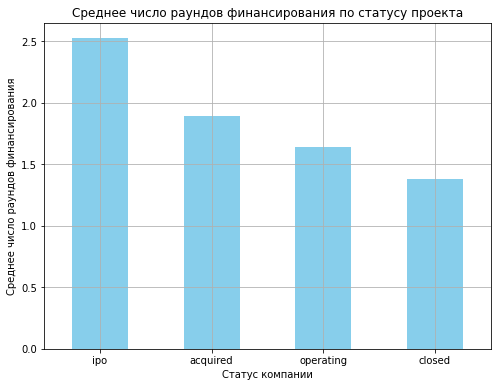

In [109]:
# строим визуализацию
plt.figure(figsize=(8, 6))

finance_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False).plot(
    kind='bar',
    rot=0,
    color='skyblue',
    legend=False,
    title='Среднее число раундов финансирования по статусу проекта')

plt.xlabel('Статус компании')
plt.ylabel('Среднее число раундов финансирования')
plt.grid()
plt.show()

Таким образом значения столбца `funding_rounds` распределены неравномерно, превалирующее большинство занимают компании с единственным раундом финансирования, далее идут компании с 0, 2 и 3 раундами финансирования соответственно по убыванию. Распределение по статусам компаний среднего числа раундов финансирования показывает, что для категории `ipo` среднее число раундов финансирования превышает 2.5 и приближается к 3, для категории `acquired` этот показатель почти дотягивает до 2 раундов, для категории `operating` - превышает 1.5 раунда, а для категории `closed` - более 1, но менее 1.5.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

### Общий обзор проделанной работы.

В ходе исследования были изучены датасеты:
* `acquisition`, содержащий информацию о покупках одних компаний другими;
* `company_and_rounds`, содержащий информацию о компаниях и раундах финансирования;
* `education`, содержащий информацию об образовании сотрудников;
* `people`, содержащий информацию о сотрудниках;
* `degrees`, содержащий информацию о типе образования сотрудника;
* дополнительный датафрейм `fund`, содержащий информацию о фондах.

**1.** Каждый датафрейм проверен на пропуски и дубликаты, логически подходящим столбцам присвоен тип даты и времени.


**2.** Наименования колонок в датафрейме `company_and_rounds` приведены к типу snake_case.

**3.** Осуществлена проверка на количество пропусков для выяснения полноты представленных данных.

**4.** Выяснено, что столбец `network_username` не подходит для объединения нескольких датафреймов ввиду малого количества пересечений данных в соответствующих колонках.

**5.** Датафрейм `company_and_rounds` разделен на два побочных логически объяснимых датасета `company_df` и `rounds_df`, из которых скорее всего был образован изначально. Каждый из этих датасетов приведен к форме, удобной для дальнейшего анализа, и может использоваться самостоятельно.

**6.** Получен новый датафрейм `base_df` путем фильтрации `company_df`. В нем представлены те компании, которые меняли или готовы менять владельцев - есть данные по получению инвестиций или финансирования, именно такие данные интересуют заказчика.

**7.** Получен новый датафрейм `sold_df` (из соединения `base_df` и `acquisition`) с компаниями, которые были проданы за 0 или 1 доллар, при этом имеют ненулевой общий объем финансирования. В качестве коэффициента при расчете нижнего и верхнего порогов выбран 2.5 вместо 1.5, для того чтобы больше значений вошло в "нормальные", не отбрасывались и не считались выбросами.

### Выводы.

* По сводной таблице по годам с информацией о типичном размере средств, выделяемом в рамках одного раунда, и об общем количестве финансирования за год можно заметить тенденцию к дроблению финансирования на большое количество раундов, при это снижается объем выделяемых на каждый из раундов средств. Эта тенденция прослеживается с 2005 года.

* Если разделить все компании на 3 группы по количеству работников, то заметны следующие интересные выводы: наибольшая численность сотрудников без наличия какой-либо информации об образовании наблюдается в так называемых микро предприятиях (численность персонала до 15 чел. вкл.) - 47% от всех работников в этом типе, затем идут малые предприятия (16-100 чел.) с 39% работников, только потом средние предприятия с численностью более 100 человек - 28%. Это может указывать на возможные выводы: предприятия с маленькой численностью менее строги к "профилю" работника, так как скорее всего представляют из себя общества знакомых друг другу людей, либо же ИП (о чем свидетельствует 75й процентиль), предприятия же побольше имеют свою политику при наборе наемных рабочих и строго проверяют их портфолио.

* Наиболее типичным размером финансирования считается размер в 600 тыс. долларов, показатель рассчитывался по медиане, так как среднее сильно реагирует на выбросы. Выбивающимися значениями можно считать размер финансирования более 134 млн долларов.

* Аналитически рассчитанные нижняя и верхняя границы выбросов у компаний (конкретно этим границам соответствуют значения 3750 и 49250000), проданных за 0 или 1 доллар, соответствуют процентилям 0 и 95. Если проводить фильтрацию по верхнему порогу, в полученный датафрейм войдут 94.4% данных. В принципе, теоретически это применяемо, так как значения выше 95-процентного показателя принято считать выбросами.

* Стоит обратить внимание на такие категории как `cleantech`, `biotech` и `hardware` как категории, отличающиеся наибольшими типичными ценами и наибольшим разбросом цен за стартап.

* Для каждого возможного статуса стартапа выявлено типичное значение числа раундов финансирования. В категории **ipo** такое значение равняется приближается к 3 раундам, а в категориях **acquired**, **operating** и **closed** - лежит в промежутке от 1 до 2 раундов. В целом, по всему датафрейму популярным является 1 раунд финансирования, затем следуют 0, 2 и 3 раунда.